<a href="https://colab.research.google.com/github/Vaishali0418/Machine_Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishalirathore24","key":"47444d9d4c32fc37177eec0f64f62529"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 98.2MB/s]


In [ ]:
!unzip /content/diabetes-prediction-dataset.zip

Archive:  /content/diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


## Importing the Dependencies

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN
from imblearn.under_sampling import InstanceHardnessThreshold, NeighbourhoodCleaningRule, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE , ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
pd.read_csv?

## 1.Display Top 5 Rows of the Dataset

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2.Check Last 5 Rows of the dataset

In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# 3.Check Sample Of The data

In [ ]:
data.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
27142,Male,53.0,0,0,never,27.83,5.7,140,0
9649,Male,58.0,0,1,never,33.75,6.0,155,0
77964,Female,59.0,0,0,not current,24.63,5.8,155,0
35018,Female,47.0,0,0,never,27.39,6.0,160,0
2453,Male,55.0,1,0,never,29.71,3.5,145,0


# Getting the statistical measure of the data

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Number of rows and 'column in this dataset
data.shape

(100000, 9)

## 5. Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

0----> Non-Diabetic

1----> Diabetic

In [ ]:
data.groupby('diabetes').mean()

<ipython-input-41-0f8e6fe4a4ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [ ]:
# Seperating the data and locals
X=data.drop(columns = 'diabetes', axis=1)
Y=data['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


# Exploratory data analysis

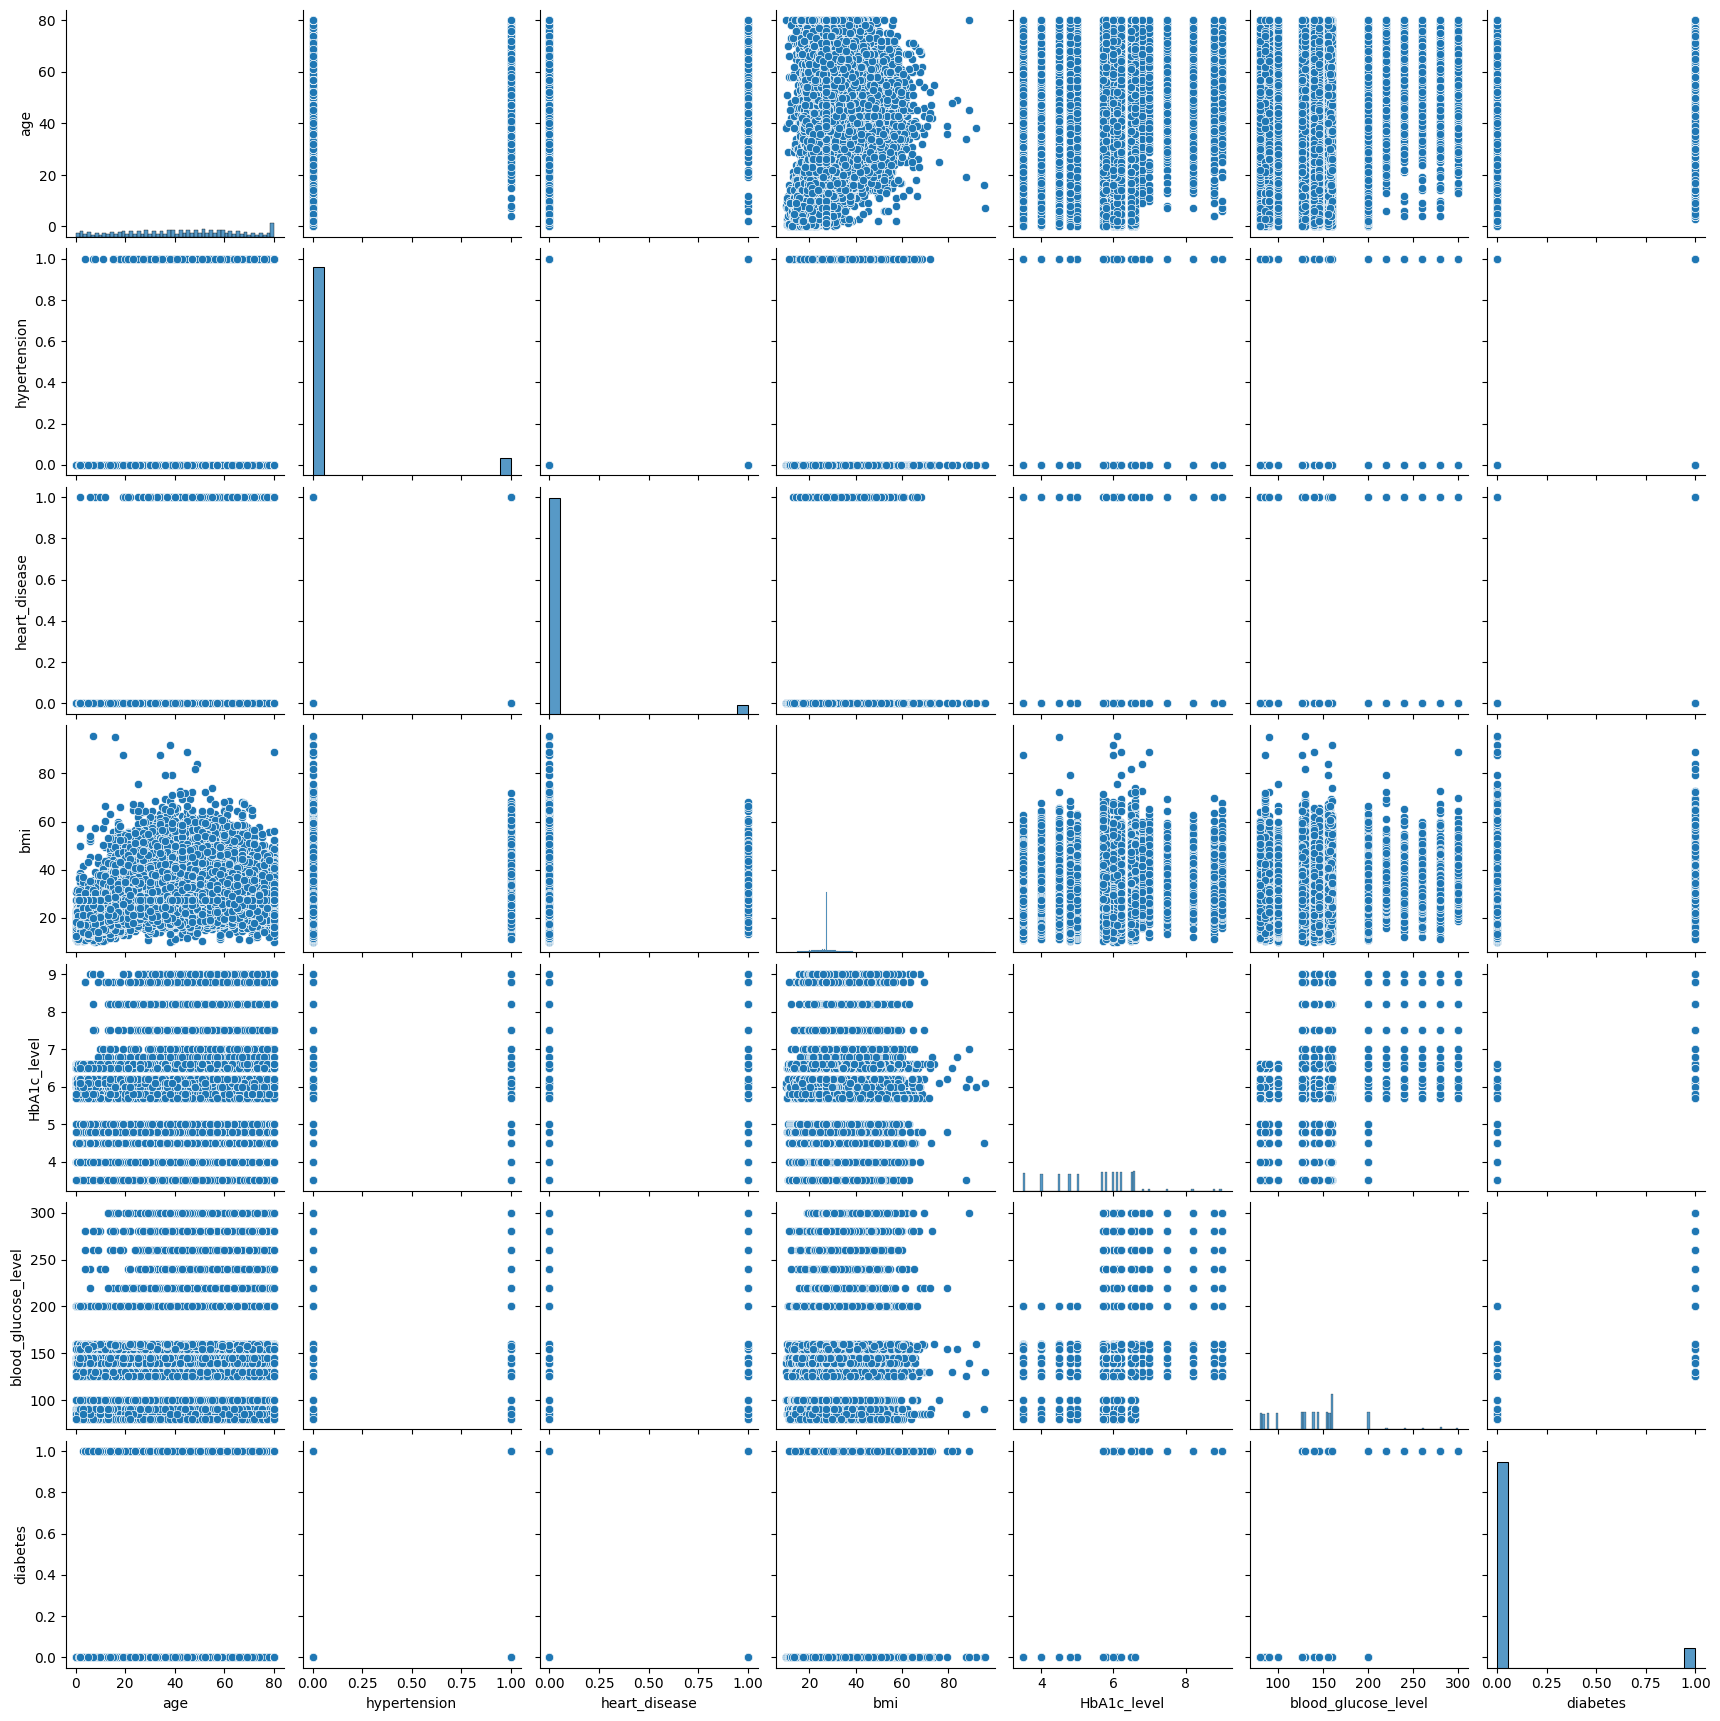

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

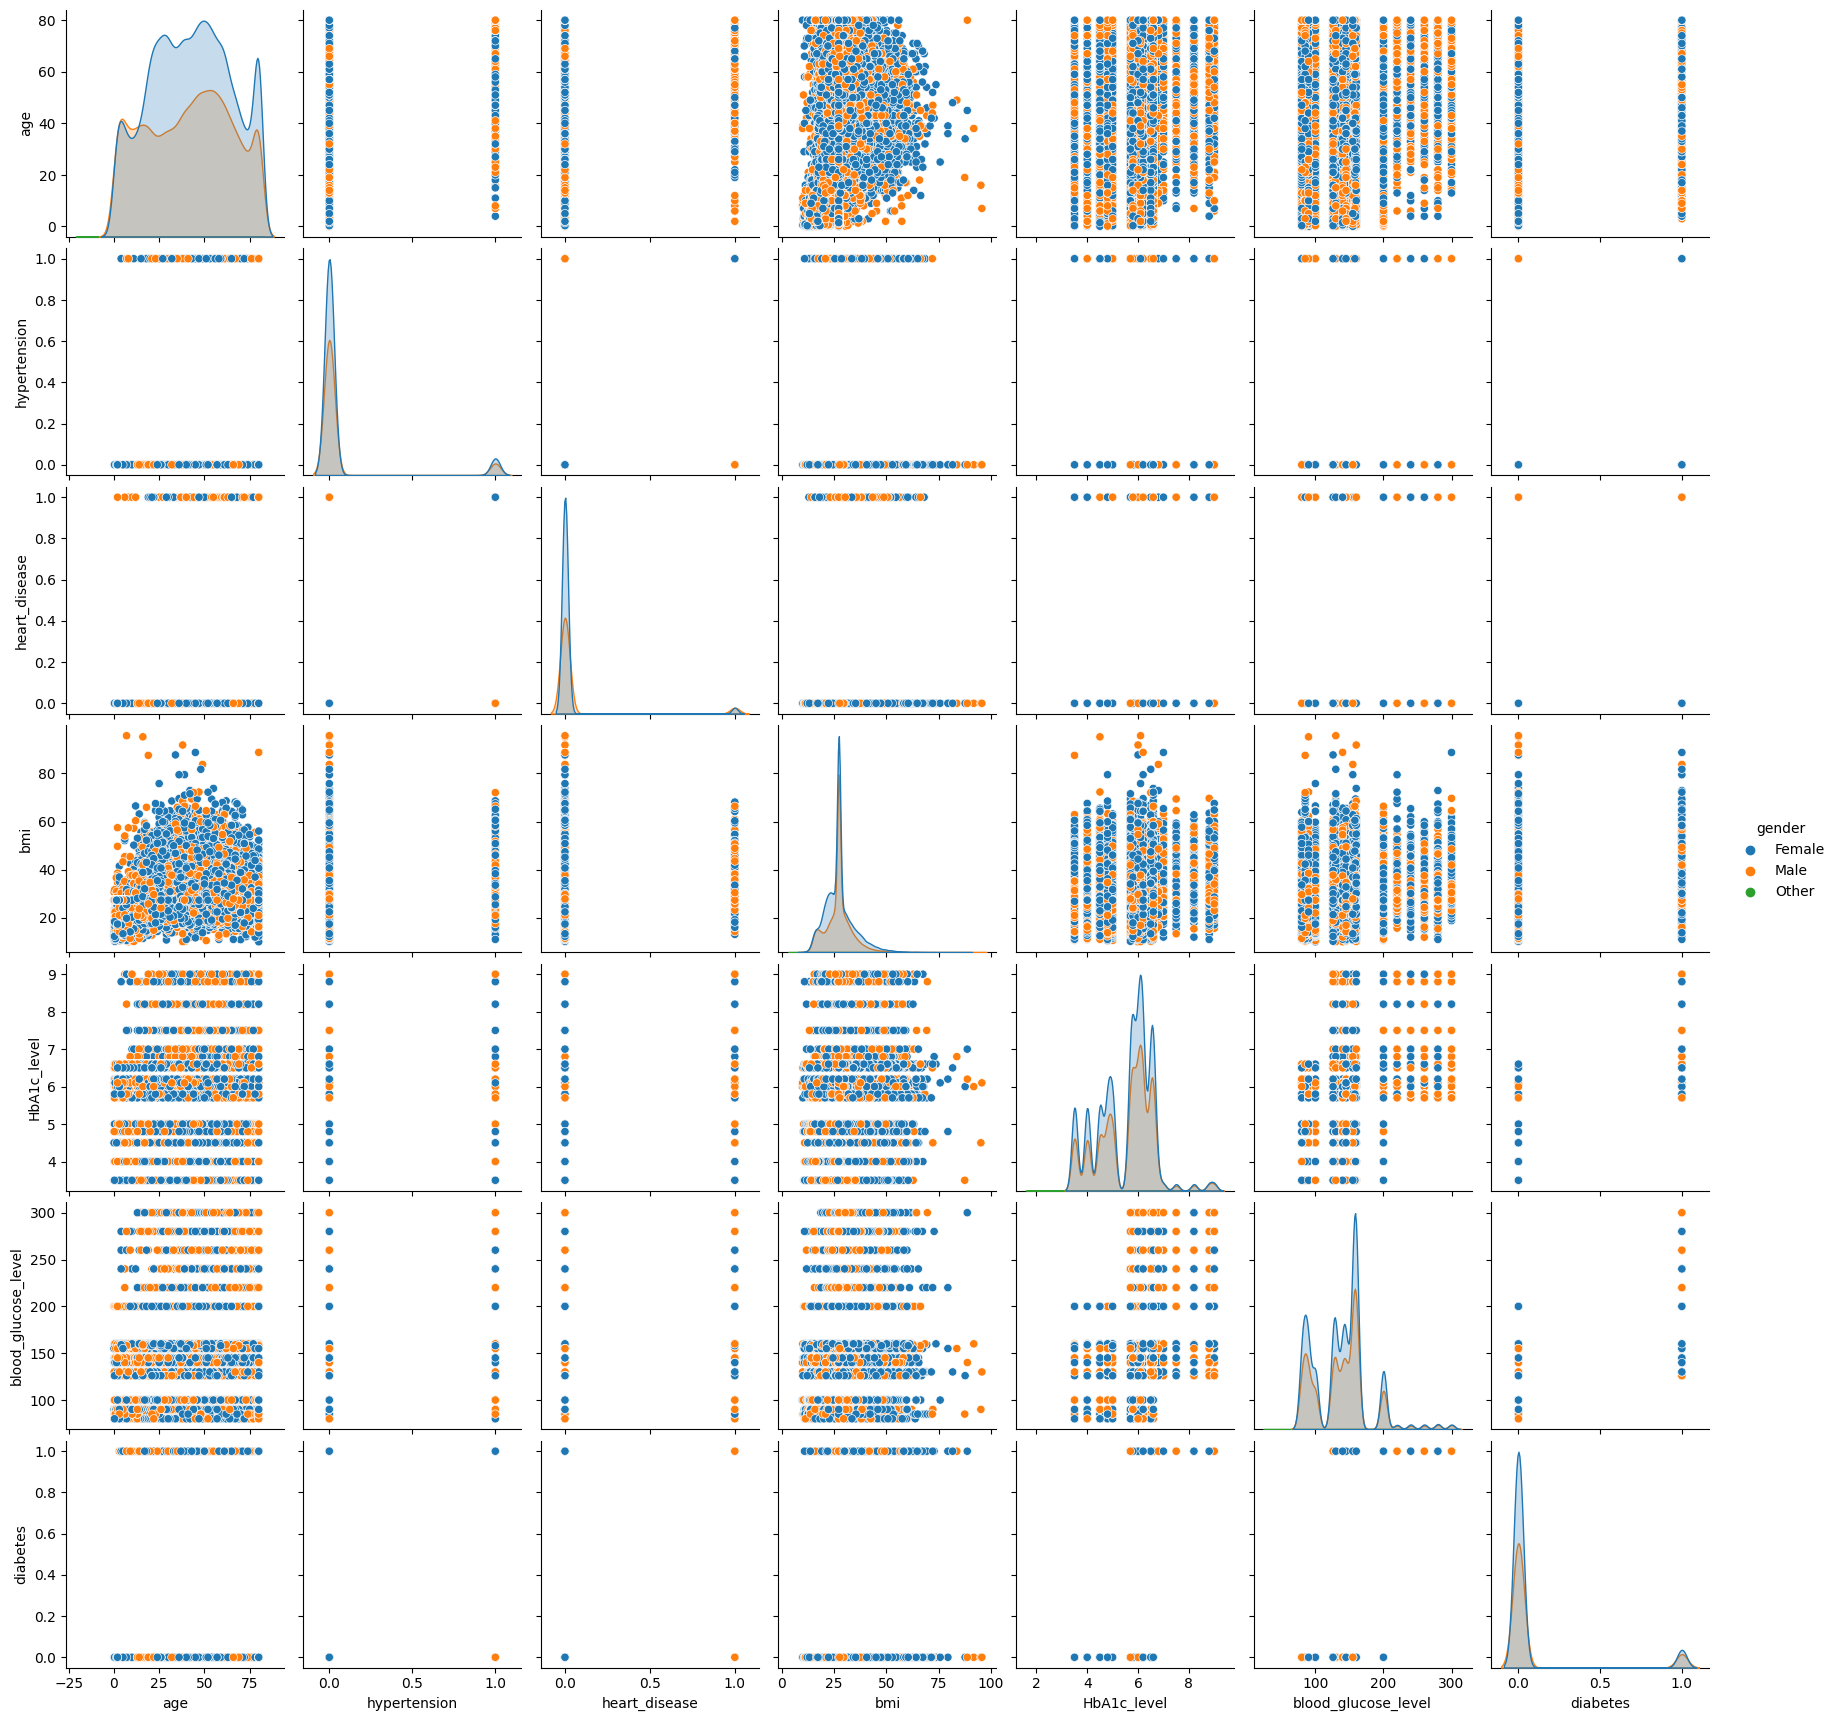

In [ ]:
sns.pairplot(data,hue='gender')

<ipython-input-23-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

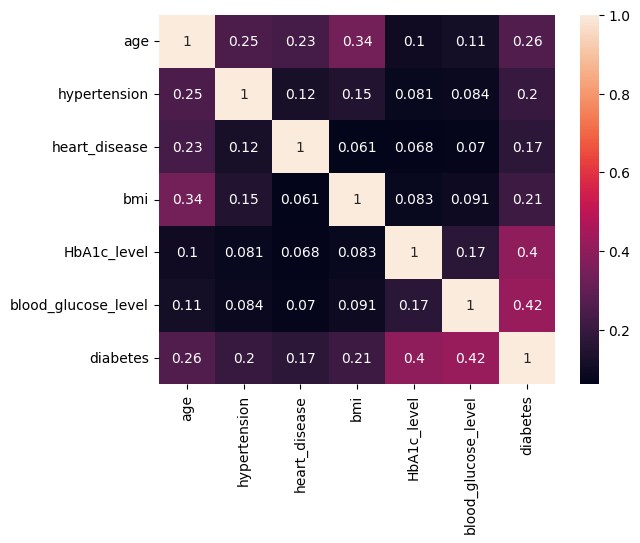

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
targettemp=data.diabetes.value_counts()

<Axes: xlabel='diabetes', ylabel='count'>

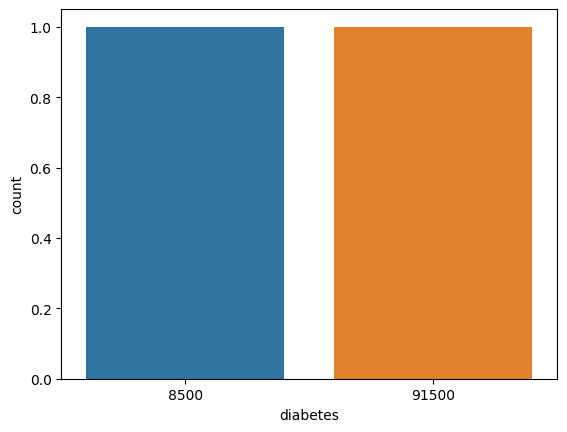

In [ ]:
y=data['diabetes']
#
#sns.barplot(y)
#sns.boxplot(y)
sns.categorical.countplot(x=targettemp)

<Axes: xlabel='diabetes', ylabel='count'>

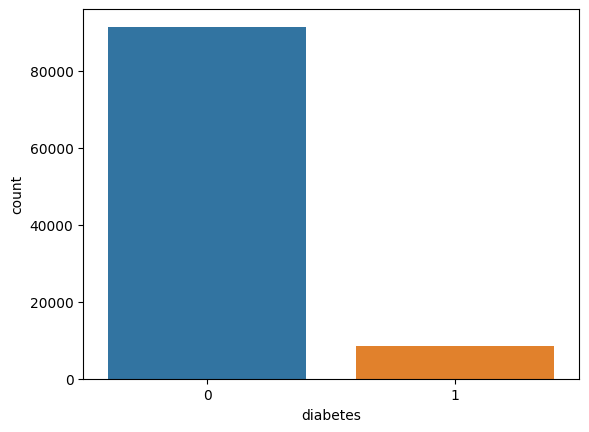

In [ ]:
sns.countplot(x=y)

<Axes: xlabel='gender', ylabel='diabetes'>

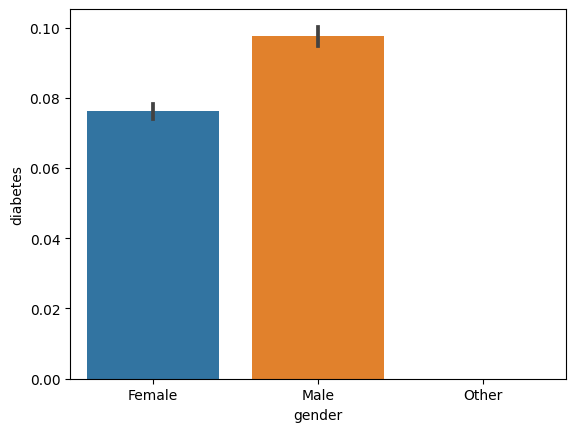

In [ ]:
sns.barplot(x=data["gender"],y=y)

<Axes: xlabel='heart_disease', ylabel='diabetes'>

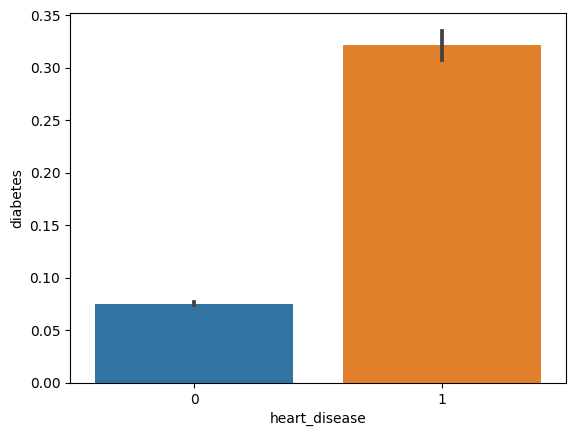

In [ ]:
sns.barplot(x=data["heart_disease"],y=y)

<Axes: xlabel='age', ylabel='diabetes'>

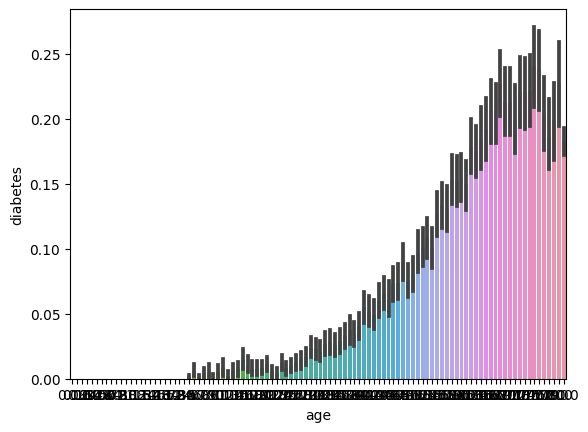

In [ ]:
sns.barplot(x=data["age"],y=y)

# Splitting data set

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('diabetes',axis=1)
y=data['diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(80000, 8)

In [ ]:
x_test.shape

(20000, 8)

# Split and Train

In [ ]:
x = data.drop("diabetes",axis=1)
y = data.diabetes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (70000, 8)
x test:  (30000, 8)
y train:  (70000, 1)
y test:  (30000, 1)


# Data Exploration :

In [ ]:
# gender :
data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
# removing records with gender not defined "low number of records which will not affect the result"
data = data[data['gender']!='Other']

num_var = list(data['gender'].value_counts().values)
labels = list(data['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

print(num_var)
print(labels)

[58552, 41430]
['Female', 'Male']


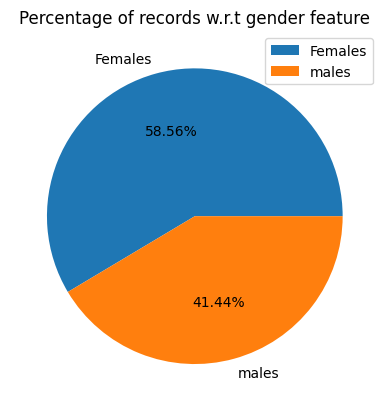

In [ ]:
# Gender visualization
plt.pie(count_dict.values(), labels = ['Females', 'males'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature');

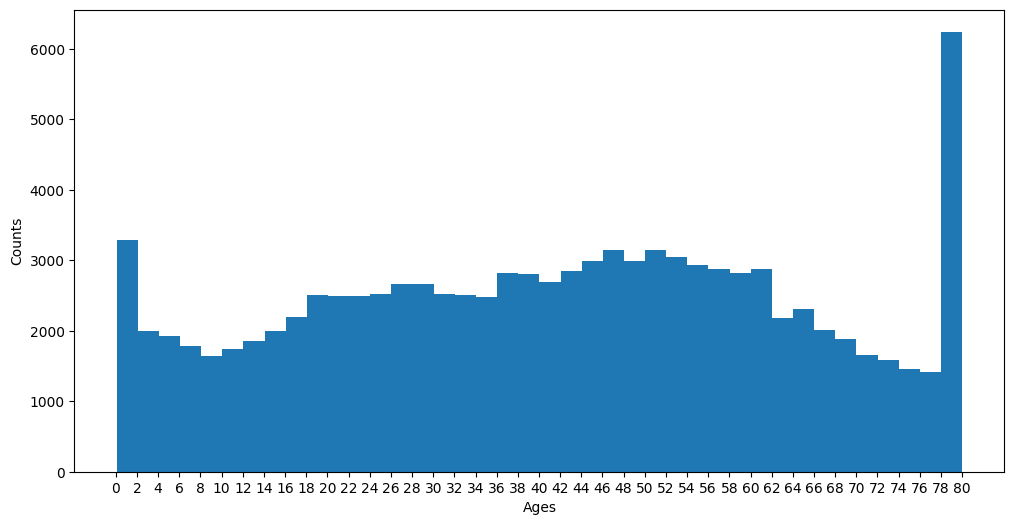

In [ ]:
# age :
plt.figure(figsize = [12,6]);
plt.hist(data['age'], bins = 40);
plt.xlabel('Ages');
plt.ylabel('Counts');
plt.xticks(np.arange(0,82,2));

In [ ]:
# hypertension :
data['hypertension'].value_counts()

0    92497
1     7485
Name: hypertension, dtype: int64

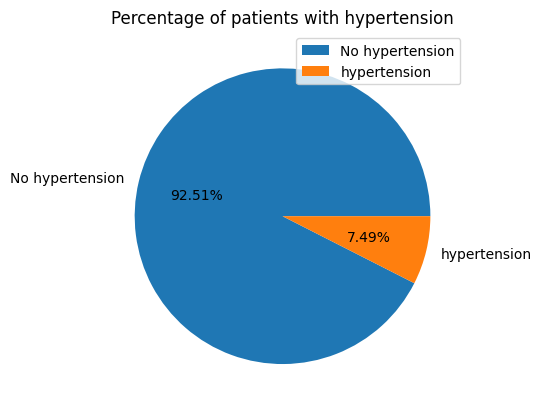

In [ ]:
num_var = list(data['hypertension'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['No hypertension', 'hypertension'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with hypertension');

In [ ]:
# heart_disease :
data['heart_disease'].value_counts()

0    96040
1     3942
Name: heart_disease, dtype: int64

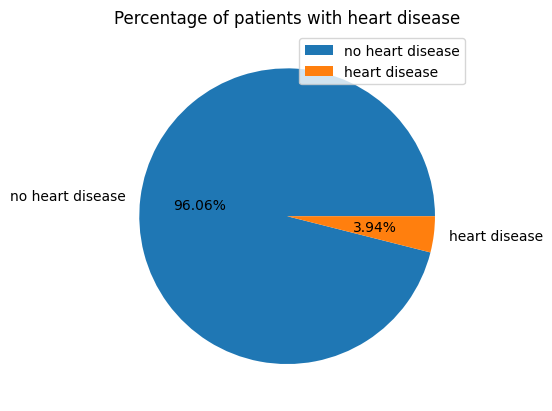

In [ ]:
num_var = list(data['heart_disease'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['no heart disease', 'heart disease'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with heart disease');

In [ ]:
# smoking_history :
data['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [ ]:
data[data['smoking_history'] == 'No Info'].shape[0] / data.shape[0] *100

35.81644696045288

In [ ]:
# removing smoking_history column :
data = data.drop(columns = ['smoking_history'])

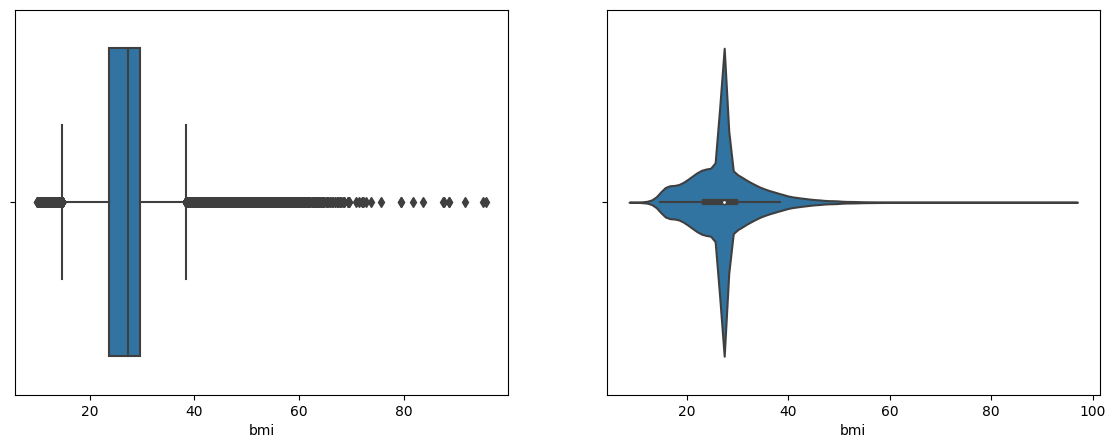

In [ ]:
# bmi :
plt.figure(figsize = [14,5]);
plt.subplot(1,2,1);
sb.boxplot(data = data, x = 'bmi');

plt.subplot(1,2,2);
sb.violinplot(data = data, x = 'bmi');

In [ ]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)

# determine the upper and lower boundries :
upper_boundry = data['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['bmi'].quantile(0.25) - (IQR*1.5)

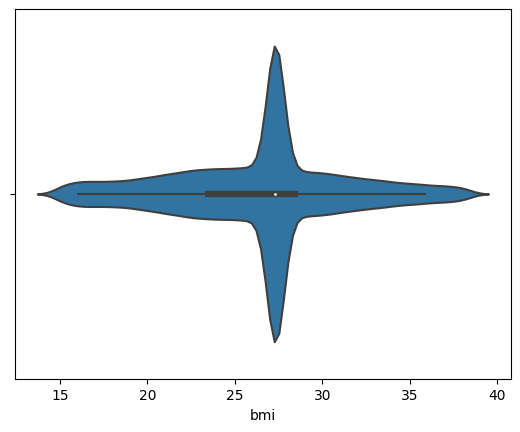

In [ ]:
# removing outliers :
data = data[data['bmi'] <= upper_boundry]
data = data[data['bmi'] >= lower_boundry]

sb.violinplot(data = data, x = 'bmi');

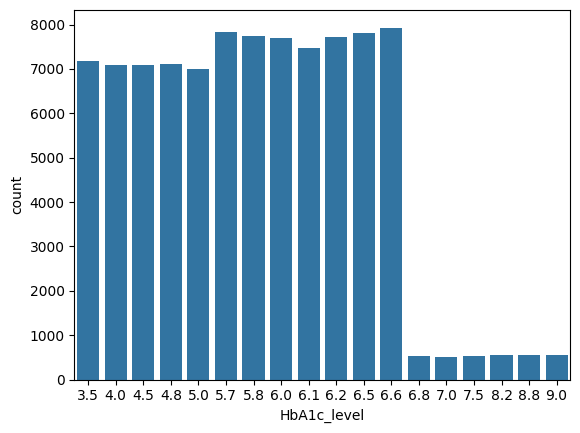

In [ ]:
# HbA1c_level :
base_color = sb.color_palette()[0]
sb.countplot(data = data, x = data['HbA1c_level'], color = base_color);

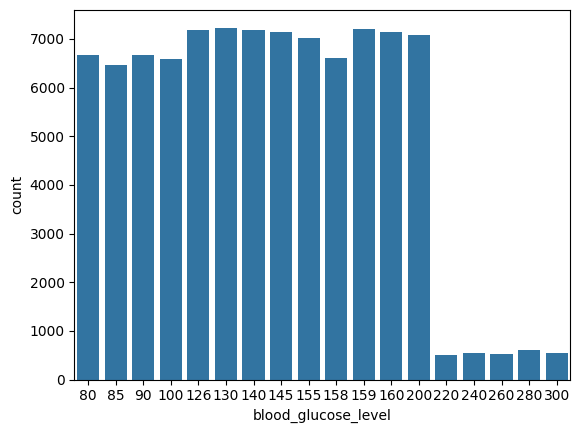

In [ ]:
# blood_glucose_level :
sb.countplot(data = data, x = data['blood_glucose_level'], color = base_color);

In [ ]:
# diabetes :-
labels = list(data['diabetes'].value_counts().index)
num_var = list(data['diabetes'].value_counts().values)
print(labels)
print(num_var)

[0, 1]
[85875, 7022]


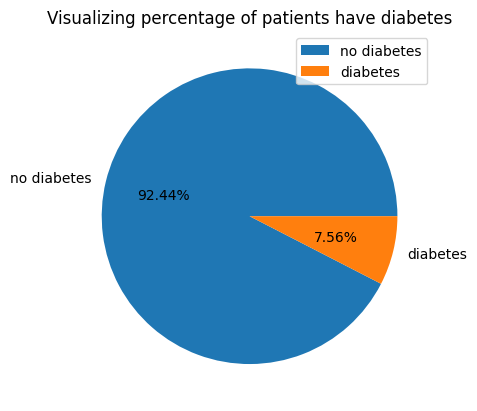

In [ ]:
# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(num_var, labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%');
plt.legend();
plt.title('Visualizing percentage of patients have diabetes');

In [ ]:
# reset index after removing some outliers and duplicates :-
data = data.reset_index(drop=True)

2. Bivariate Visualization :

We will create some new features for better visualization

1. HbA1c_level vs. diabetes :-

HbA1c_level

A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

we will create a new feature bassed on the value of (HbA1C)

HbA1c level	initial diagnosis
< 5.7	Normal
5.7 – 6.4	Prediabetes
>= 6.5	Diabetes

In [ ]:
diagnosing = []
for value in data['HbA1c_level']:
    if value < 5.7:
        diagnosing.append('normal')

    elif (5.7 <= value) and (value <= 6.4):
        diagnosing.append('prediabetes')

    elif (value >= 6.5):
        diagnosing.append('diabetes')

data['initial_diagnosis'] = diagnosing

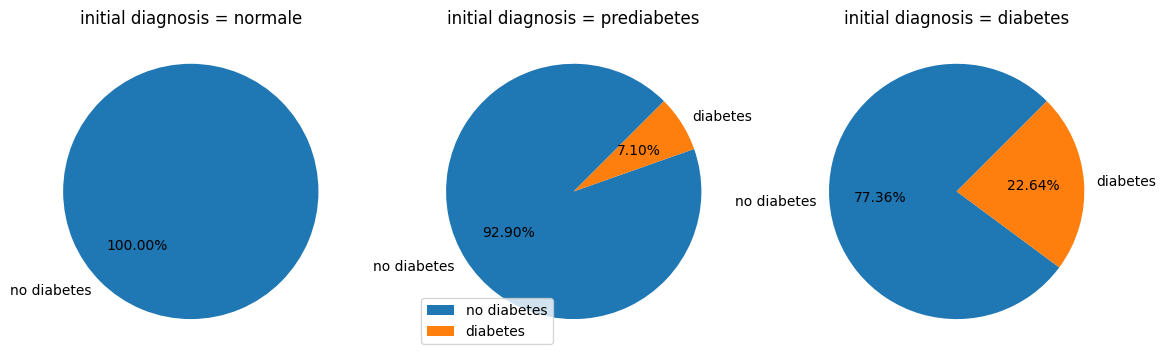

In [ ]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(data[data['initial_diagnosis'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = normale');

plt.subplot(1,3,2);
plt.pie(data[data['initial_diagnosis'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(data[data['initial_diagnosis'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('initial diagnosis = diabetes');

we can see that the value of HbA1c_level affect on the prediction whether it diabetes or not
when the value of HbA1c_levellies on normale value , we see that there is no records with diabetes
as HbA1c_level value increases, number of records with diabetes increases ## specially when it >= 6.5
HbA1c level	initial diagnosis	actual diagnosis
< 5.7	Normal	100% no diabetes
5.7 – 6.4	Prediabetes	7.47% have diabetes
>= 6.5	Diabetes	23.64% have diabetes

2. bmi vs diabetes :-

# **BMI**

Body mass index is a measure of body fat based on height and weight that applies to adult men and women.

it is the weight in kilograms divided by height in meters squared

In [ ]:
weight_type = []

for value in data['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')

    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')

    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')

    elif (value > 29.9):
        weight_type.append('obesity')

data['weight_type'] = weight_type

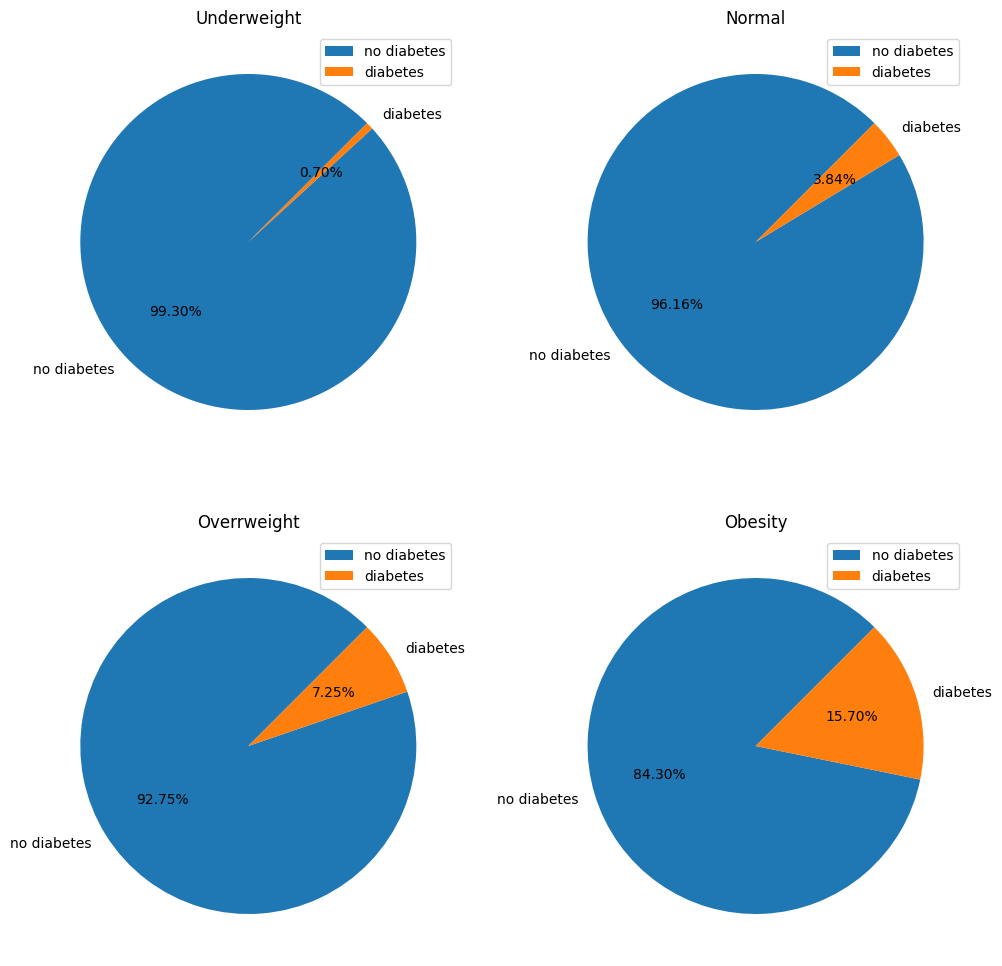

In [ ]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

plt.subplot(2,2,1);
plt.pie(data[data['weight_type'] == 'underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(data[data['weight_type'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(data[data['weight_type'] == 'overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(data[data['weight_type'] == 'obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

> according to ordinal category ['underweight','normal','overweight','obesity'], as weight category increases, percentage of patients with diabetes increase.

**This Above Data Tells Us To Predict Whether A Patient Has Diabetes Or Not.**